## **1. Exploración Inicial:**

   - Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

   - Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

   - Une los dos conjuntos de datos de la forma más eficiente. 

In [1]:
# Inicio, importar librerias necesarias:
# pandas: tratamiento de DataFrames
# numpy: control numérido
# matplotlib: visualizaciones
# seaborn: visualizaciones avanzadas


import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


In [2]:
# Lectura de ficheros csv
#Se guardan en dos dataframes diferentes
df_activity = pd.read_csv('Customer Flight Activity.csv', on_bad_lines='skip')
df_history = pd.read_csv('Customer Loyalty History.csv', on_bad_lines='skip')


In [3]:
'''Funciones '
'check: visualización'
'null_check: Comprobar  nulos'
'tratar_null: Tratamiento de nulos'
'tratar_duplis:  tratar los duplicados
Esta casilla vamos a guardar las funciones que posteriormente pasaremos a un fichero .py y llamaermos desde main

'''

#Función para comprobar forma, columnas, tiipos de datos, nulos EDA
#Nos ayudará a entender los datos
#La usaremos en el futuro pasando un dataframe

def check(df):
        print(f"La forma:")
        print(f"{df.shape}\n")
        print(f"\n-----------------------------\n")
        print(f"Las columnas:")
        print(f"{df.columns}\n")
        print(f"\n-----------------------------\n")
        print(f"Los tipos de datos:")
        print(f"{df.dtypes}\n")
        print(f"\n-----------------------------\n")
        print(f"Los nulos:")
        print(f"{df.isnull().sum()}\n")
        print(f"\n-----------------------------\n")
        print(f"Los duplicados:")
        print(f"{df.duplicated().sum()}\n")
        print(f"\n-----------------------------\n")
        print(f"Los principales estadísticos:")
        print(f"{df.describe().T}\n")

        print(f"Las modas de las columnas categóricas:\n")
        columnas_cat = df.select_dtypes(include = 'object')
        for columna in columnas_cat:
            if df[columna].isnull().any():
                print(f"Revisando {columna}")
                print(df[columna].value_counts())  
                print("") 
        print(f"\n-----------------------------\n")
        return


def null_check(df):
    
        print(" COLUMNAS CATEGÓRICAS")
        col_obj = df.select_dtypes(include='object').columns
        #Lista para guardar columnas

        found_obj = False  #Manera de comprobar que vamos a encontra nulos las columnas categoricas
        #Recorremos el bucle columna por columna
        for col in col_obj:
            
            por = df[col].isnull().mean() * 100
            if por > 0:
                print(f" - {col}: {por:.0f}% de nulos")
                #Si el porcentaje es de X se podria comparar aqui y tratar


                found_obj = True #Check de que ha encontrado nulos

        if not found_obj:
            print(" No hay nulos en columnas categóricas")


        #Ahora comprobación de columas de tipo numérico
        print(" COLUMNAS NUMÉRICAS")
        col_num = df.select_dtypes(include='number').columns
        
        found_num = False
        for col in col_num:
            por = df[col].isnull().mean() * 100
            if por > 0:
                print(f" - {col}: {por:.0f}% de nulos")
                found_num = True
        if not found_num:
            print(" No hay nulos en columnas numéricas")


''' 
Esta función va a comprobar los nulos, porsteriormente, tras comprobar el % de nulos toma la decisión de como tratar
En variables categoricas
% pocos---> La moda
% Muchos---> otra categoria
En columnas de tipo numerico

 '''
 

def tratar_null(df):
    
    col_obj = df.select_dtypes(include='object').columns        
    col_num = df.select_dtypes(include='number').columns
    #Lista para guardar columnas, trataremos una a una las nulas, dependiendo el tipo de dato y % de datos
    #Recorremos el bucle columna por columna
    for col in col_obj:
        por = df[col].isnull().mean() * 100
        if por == 0:
            print(f"No hay nulos en: {col} ")
        else:    
            if por < 20:
                # Pocos nulos: imputar con la moda (valor más frecuente)
                print(f"Tratando columna: {col} ({por:.0f}% nulos) -> Moda")
                df[col] = df[col].fillna(df[col].mode()[0])

            elif 20 <= por < 80:
                # Bastantes nulos: imputar con valor genérico
                print(f"Tratando columna: {col} ({por:.0f}% nulos) -> 'Unknown'")
                df[col] = df[col].fillna('Unknown')

            else:
                # Demasiados nulos: se puede optar por eliminar o marcar aparte
                print(f"Columna {col} tiene {por:.0f}% nulos. Considerar eliminarla o analizarla aparte.")
                df.drop(df[col], axis=1, inplace=True)

            #Si el porcentaje es de X se podria comparar aqui y tratar
            #Ahora comprobación de columas de tipo numérico
    for col in col_num:
        por = df[col].isnull().mean() * 100
        if por == 0:
                print(f"No hay nulos en: {col} ")
        
        else:    
            if por < 30:
                # Pocos nulos: imputar con la media
                print(f"Tratando columna: {col} ({por:.0f}% nulos) -> Media")
                imputer = SimpleImputer(strategy='mean')
                df[col] = imputer.fit_transform(df[[col]])

            elif 31 <= por < 70:
                # Porcentaje medio-alto de nulos: imputar con KNN
                print(f"Tratando columna: {col} ({por:.0f}% nulos) -> KNNImputer")
                imputer_knn = KNNImputer(n_neighbors=5)
                df[col] = imputer_knn.fit_transform(df[[col]])

            elif por > 71:
            # Demasiados nulos: imputar con un valor neutro o eliminar
                print(f"Columna {col} tiene {por:.0f}% nulos. Considerar eliminarla o imputar manualmente.")
                #df=df.drop(df[col], axis=1)
        #Ya tratadito devolvemos el df
    
    return df
           

def trata_duplis(df):
    df = df.drop_duplicates()    
    return df   
        



In [4]:
check(df_history)  # Datos del programa según usuario
check(df_activity)  #Perfil de la gente asociada al programa de puntos


La forma:
(16737, 16)


-----------------------------

Las columnas:
Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')


-----------------------------

Los tipos de datos:
Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object


-----------------------------

Los nulos:
Loyalty Number            0
Country               

Después de una visualización rápida, lo primero:
- Pasar a minuscula las columnas
- Reemplazar el espacio por _

In [5]:
#Para evitar errores, paso el nombre de las columnas a minúscula
df_activity.columns=df_activity.columns.str.lower()
df_activity.columns = df_activity.columns.str.replace(' ','_',)


In [6]:
#Para evitar errores, paso el nombre de las columnas a minúscula
df_history.columns = df_history.columns.str.lower()
df_history.columns = df_history.columns.str.replace(' ','_')


In [7]:
df_activity.sample(3)
#Visualización rapida de lo que contiene el dataframe


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
82674,902148,2017,5,0,0,0,0,0.0,0,0
27013,638004,2017,2,0,0,0,0,0.0,0,0
336440,916000,2018,8,0,0,0,0,0.0,0,0


In [8]:
df_history.sample(3)
#Visualización rapida de lo que contiene el dataframe

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
2806,912128,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,63730.0,Married,Aurora,8982.85,Standard,2017,7,NaN,NaN
11834,805431,Canada,Quebec,Hull,J8Y 3Z5,Female,Bachelor,99444.0,Married,Star,2759.98,Standard,2014,4,NaN,NaN
6763,873498,Canada,Ontario,Toronto,P1J 8T7,Male,Bachelor,75642.0,Married,Nova,5532.86,Standard,2013,4,NaN,NaN


In [ ]:
df_sky = pd.merge(df_history, df_activity, on='loyalty_number', how='left')
# unimos los dos dataframes en uno solo, usando la columna loyalty_number que es común a ambos
# y hacemos un left join para no perder datos del df_history que es el principal, y estará en la izquierda
# el left join es porque queremos conservar todos los registros del df_history, aunque no tengan coincidencias en df_activity

In [10]:
df_sky.sample(5)
# Visualización rápida del nuevo dataframe unido

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,...,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
301854,510264,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,Bachelor,101352.0,Married,Star,...,NaN,2017,7,0,0,0,0,0.0,0,0
158599,692291,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,Bachelor,58700.0,Married,Nova,...,11.0,2017,8,0,0,0,0,0.0,0,0
164360,604039,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,68791.0,Divorced,Nova,...,7.0,2017,9,0,0,0,0,0.0,0,0
316665,553254,Canada,Alberta,Edmonton,T3G 6Y6,Male,High School or Below,45229.0,Single,Star,...,NaN,2017,10,4,0,4,1632,163.0,0,0
175099,506170,Canada,Ontario,Toronto,M8Y 4K8,Female,College,NaN,Single,Nova,...,NaN,2018,8,2,2,4,1164,116.0,0,0


In [11]:
check(df_sky)
#EDA del nuevo dataframe unido

La forma:
(405624, 25)


-----------------------------

Las columnas:
Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month', 'year', 'month',
       'flights_booked', 'flights_with_companions', 'total_flights',
       'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed'],
      dtype='object')


-----------------------------

Los tipos de datos:
loyalty_number                   int64
country                         object
province                        object
city                            object
postal_code                     object
gender                          object
education                       object
salary                         float64
marital_status                  object
loyalty_card                    object
clv          

## 2. Limpieza
   - Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
   - Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
   - Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [12]:
null_check(df_sky)
#LLama a una función que nos dice el estado de los nulos, sacando el % cuando en la columna hay nulos

 COLUMNAS CATEGÓRICAS
 No hay nulos en columnas categóricas
 COLUMNAS NUMÉRICAS
 - salary: 25% de nulos
 - cancellation_year: 88% de nulos
 - cancellation_month: 88% de nulos


In [13]:
df_sky = tratar_null(df_sky)
#Función que trata los nulos, diferencia entre numerico / categoricos y aplica o más conveniente dependiedo 
#del porcentaje 

No hay nulos en: country 
No hay nulos en: province 
No hay nulos en: city 
No hay nulos en: postal_code 
No hay nulos en: gender 
No hay nulos en: education 
No hay nulos en: marital_status 
No hay nulos en: loyalty_card 
No hay nulos en: enrollment_type 
No hay nulos en: loyalty_number 
Tratando columna: salary (25% nulos) -> Media
No hay nulos en: clv 
No hay nulos en: enrollment_year 
No hay nulos en: enrollment_month 
Columna cancellation_year tiene 88% nulos. Considerar eliminarla o imputar manualmente.
Columna cancellation_month tiene 88% nulos. Considerar eliminarla o imputar manualmente.
No hay nulos en: year 
No hay nulos en: month 
No hay nulos en: flights_booked 
No hay nulos en: flights_with_companions 
No hay nulos en: total_flights 
No hay nulos en: distance 
No hay nulos en: points_accumulated 
No hay nulos en: points_redeemed 
No hay nulos en: dollar_cost_points_redeemed 


In [14]:
#La funcion de tratar nulos nos ha devuelto un nuevo df, y a parte como da fallo en el borrado
#He considerado borrar las dos columnas que me indica

df_sky.drop('cancellation_year', axis=1, inplace=True)
df_sky.drop('cancellation_month', axis=1, inplace=True)

In [15]:
#Comprobacion de los duplicados
#Borra las filas que estan duplicadas

df_sky = trata_duplis(df_sky)


In [16]:
#Vuelvo a comprobar si hay nulos/ duplicados y si esta todo tratado
check(df_sky)

La forma:
(403760, 23)


-----------------------------

Las columnas:
Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month', 'year',
       'month', 'flights_booked', 'flights_with_companions', 'total_flights',
       'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed'],
      dtype='object')


-----------------------------

Los tipos de datos:
loyalty_number                   int64
country                         object
province                        object
city                            object
postal_code                     object
gender                          object
education                       object
salary                         float64
marital_status                  object
loyalty_card                    object
clv                            float64
enrollment_type         

## Visualización
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:  

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
3. ¿Cuál es la distribución de los clientes por provincia o estado?
4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? 
6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [17]:
df_sky.columns
#Voy a guiarme por las columnas para ir sacando las visualizaciones

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month', 'year',
       'month', 'flights_booked', 'flights_with_companions', 'total_flights',
       'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed'],
      dtype='object')

## ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

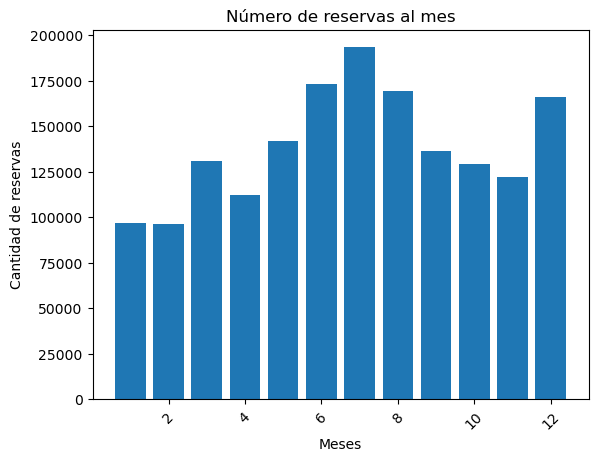

In [18]:
resumen = df_sky.groupby('month')['flights_booked'].sum()
#Cuando usamos una agrupación: eje x es agrupación.index, height es agrupación.values
plt.bar(x=resumen.index, height=resumen.values)
plt.xlabel('Meses')
plt.ylabel('Cantidad de reservas')
plt.title('Número de reservas al mes')
plt.xticks(rotation=45);


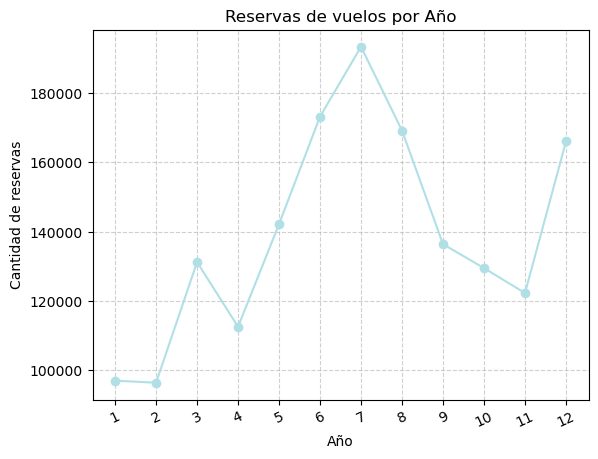

In [19]:
plt.plot(resumen.index,resumen.values, color='powderblue', marker="o")
plt.title('Reservas de vuelos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de reservas')
plt.xticks(resumen.index, rotation=25)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Las reservas de vuelos se disparan en Julio, seguido de junio y agosto. también se ve un pequeño pico en diciembre. Esta es la prueba que las reservas se disparan en los periodos vacacionales, tanto verano como Navidad.

## 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?


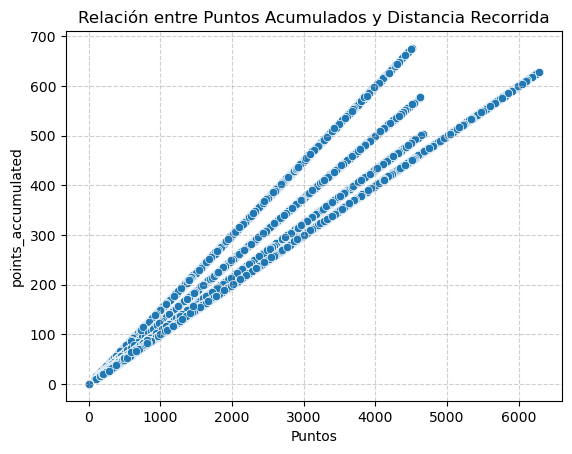

In [20]:
# Visualización de dos variables numericas (scatter pot)
sns.scatterplot(x=df_sky['distance'], y=df_sky['points_accumulated'])
plt.xlabel('Distancia')
plt.xlabel('Puntos')
plt.title('Relación entre Puntos Acumulados y Distancia Recorrida')  
plt.grid(True, linestyle='--', alpha=0.6)  


Se ve una relación sólida, mayor distancia, más puntos.
Los usuarios acumulan más puntos a mayor distancia de sus vuelos.

## 3. ¿Cuál es la distribución de los clientes por provincia o estado?

Text(0.5, 1.0, 'Distribución de Clientes por Provincia')

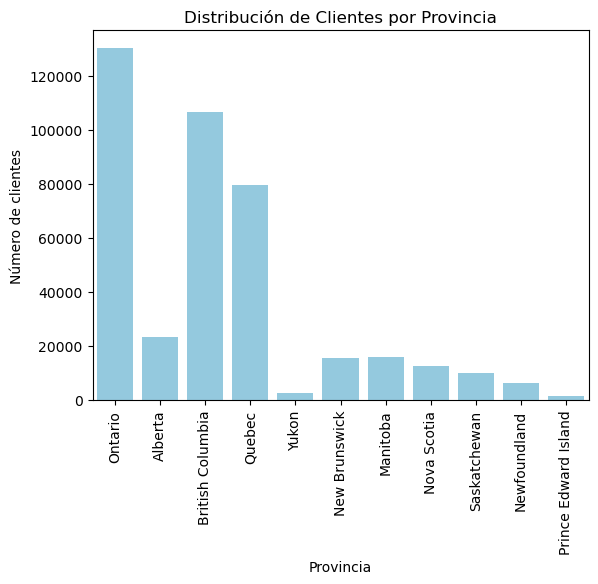

In [21]:
#count plot 
sns.countplot(data=df_sky, x='province', color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Provincia')
plt.ylabel('Número de clientes')
plt.title('Distribución de Clientes por Provincia')

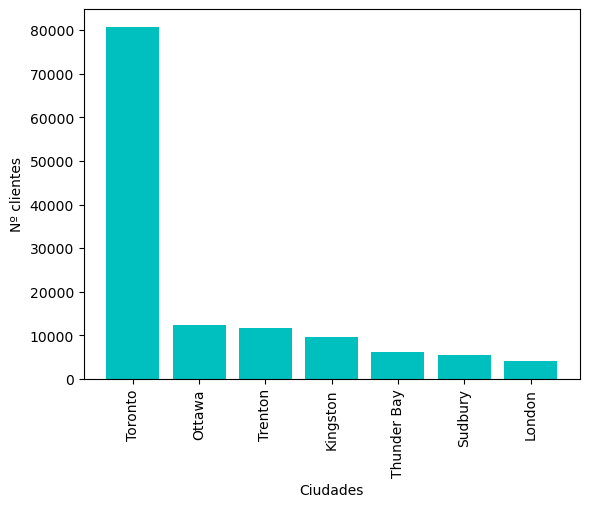

In [22]:
#Ahora quiero ver de esa provincia, cuales son las ciudades con más clientes
fil = df_sky[df_sky['province'] == 'Ontario']
cius = fil['city'].value_counts()
plt.bar(x=cius.index, height=cius.values, color='c')
plt.xticks(rotation=90)
plt.xlabel("Ciudades")
plt.ylabel("Nº clientes")
plt.show()


Los clientes pertencen a una BBDD  de Canadá, principalmente son mayoria en la provincia de Ontario, en la cual se encuentra Toronto. 

Se ve claramente que en Ontario se centran laos usuarios que más reservan, seguido de British Columbia.
Después, se ha hecho un filtro por provincia para ver cual sería la ciudad de Ontario que más reserva.

### 4  ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

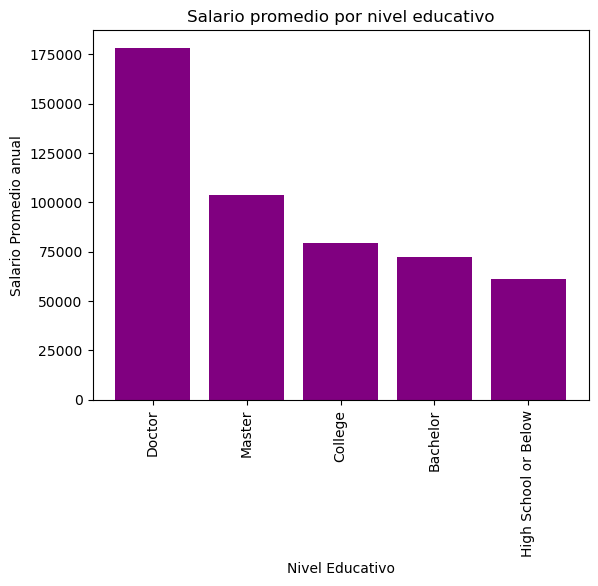

In [23]:
salar = df_sky.groupby('education')['salary'].mean().sort_values(ascending=False)
#salar.plot(kind='bar', color='pink', edgecolor='black')
plt.bar(x=salar.index, height=salar.values, color= 'purple')
plt.xticks(rotation=90) # Gira los nombres para que se vean bien
plt.title("Salario promedio por nivel educativo")
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio anual')
plt.show();





El salario medio mayor será el de los Doctores, mayor responsabilidad, mayores ingresos.
Tiene relación según sus estudios, a mayor titulación mayores ingresos.

## 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

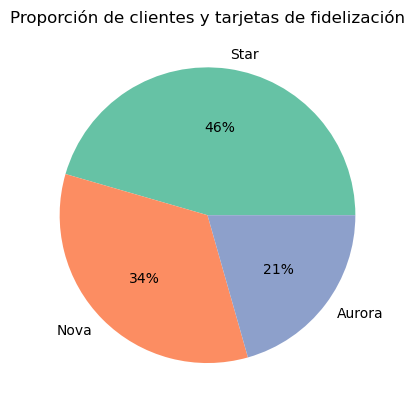

In [24]:
tarjetas = df_sky['loyalty_card'].value_counts()
categoria = tarjetas.index
plt.pie(tarjetas, labels=categoria, autopct='%1.0f%%', colors=sns.color_palette('Set2'))
plt.title('Proporción de clientes y tarjetas de fidelización')
plt.show();


- Star son la mayoría, con un 46%
- Nova seguidos con un 34%
- Aurora últimos con un 21%

### ¿Cómo se distribuyen los clientes según su estado civil y género?

In [25]:
# gender marital_status
# 2 VARIABLES CATEGÓRICAS--> crosstab
tabla1 = pd.crosstab(df_sky['gender'], df_sky['marital_status'])
tabla1

marital_status,Divorced,Married,Single
gender,,,
Female,30634,117363,54760
Male,30128,117482,53393


Podemos apreciar que hay un número muy similar entre los distintos estados civiles.
Es decir, tenemos muy balanceados estos campos, más abajo se aprecia visualmente.

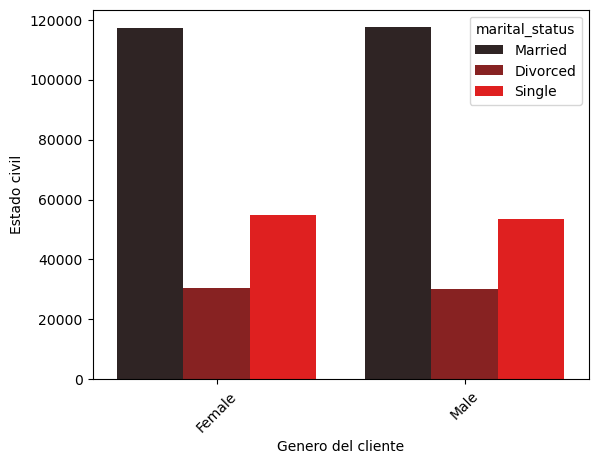

In [26]:
sns.countplot(x='gender', data=df_sky, color = 'r', hue = 'marital_status')
plt.xticks(rotation=45)
plt.xlabel("Genero del cliente")
plt.ylabel("Estado civil")
plt.show();


No se aprecian diferenicas significativas en el estado civil por genero.

## BONUS Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando el conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Tendremos en mente que los datos que tenemos son solo una muestra de una población. Para ello, los pasos que deberás seguir son: 


In [27]:
# Filtra el conjunto de datos para incluir únicamente la columna numérica relevante: 'flights_booked'
df_filtrado = df_sky[['education', 'flights_booked']]


In [28]:
#Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas 
# (como el promedio, mediana, la desviación estándar)
#  del número de vuelos reservados para cada grupo. Aquí, utilizamos estadística descriptiva normal.
df_sky.groupby('education')['flights_booked'].describe().T.round(2)

education,Bachelor,College,Doctor,High School or Below,Master
count,252567.00,102260.00,17731.00,18915.00,12287.00
mean,4.11,4.17,4.18,4.18,4.20
std,5.22,5.25,5.26,5.24,5.21
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,1.00,1.00,1.00,1.00,1.00
75%,8.00,8.00,8.00,8.00,8.00
max,21.00,21.00,21.00,21.00,21.00


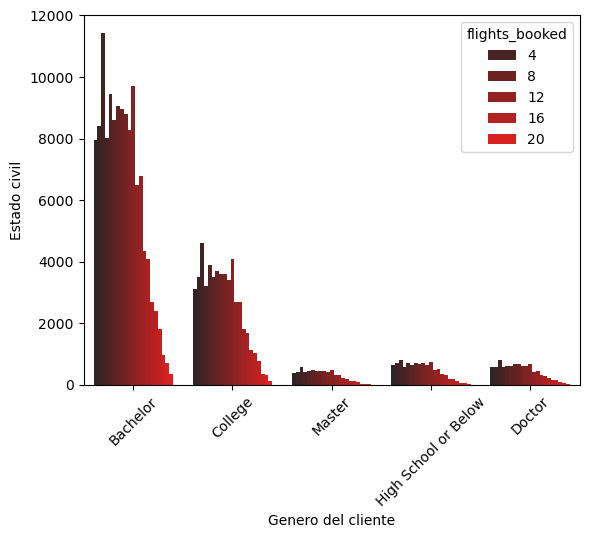

In [29]:
filt = df_sky[df_sky['flights_booked'] > 0]
sns.countplot(x='education', data=filt, color = 'r', hue = 'flights_booked')
plt.xticks(rotation=45)
plt.xlabel("Genero del cliente")
plt.ylabel("Estado civil")
plt.show();


## **Prueba Estadística:**
Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos. Aquí utilizamos estadística inferencial.

In [30]:
#1 Media de las reservas
mediaf = df_sky['flights_booked'].mean().round(2)
mediaf

np.float64(4.13)

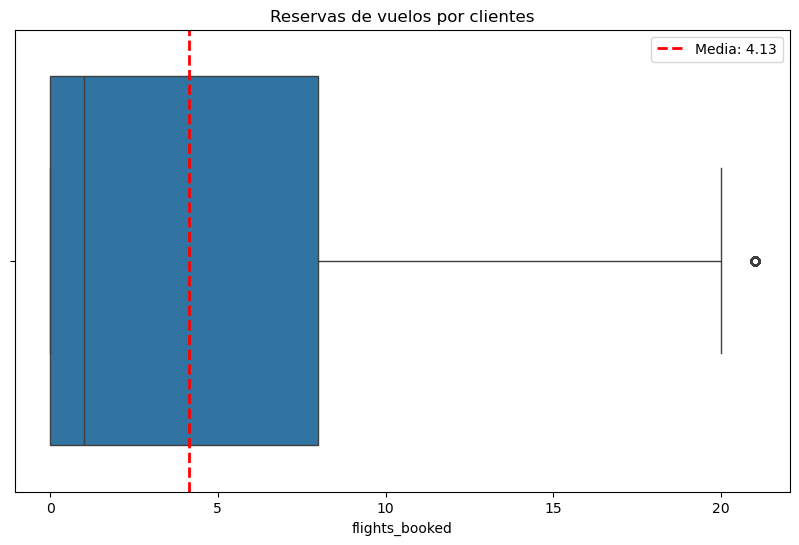

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_sky['flights_booked'])
plt.axvline(mediaf, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mediaf}')
# Añadir leyenda y título
plt.legend()
plt.title('Reservas de vuelos por clientes')
# Mostrar el gráfico
plt.show()

In [32]:
# 2. Desviación estándar del número de vuelos reservados.
std_f = df_sky['flights_booked'].std()
print(std_f)

5.230063724478074


In [33]:
#3 Seleccionar el nivel de confianza
#Tendremos que aplicar una formula para calcular el intervalo de confianza
#Para ello necesitamos el tamaño de la muestra

n = len(df_sky['flights_booked'])

confidence_interval = stats.t.interval(
    confidence=0.95,    # Nivel de confianza
    df=n-1,             # Grados de libertad. Es para corregir el sesgo. 
    loc=mediaf,  # Media de la muestra
    scale=std_f/ np.sqrt(n))  # Calculamos la variabilidad de la media. Siempre lo ponemos así


confidence_interval

(np.float64(4.113867758026849), np.float64(4.146132241973151))

In [34]:
def prueba_hipotesis(*args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versión de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney

    Parámetros:
    *args: listas o arrays con los datos de cada grupo. Espera DOS grupos a comparar

    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis.
    """
    
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50: #aquí vamos a decidir hacer komogorov porque es más potente y shapiro solo en muestras pequeñas
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales, all() solo devuelve True si todos los elementos son True

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0. Es decir, sí hay diferencias significativas)" if p_valor < alfa else "No se rechaza H0. Es decir, no hay diferencias significativas)"
    }

    # Imprimir resultados de manera más clara
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")

In [35]:
df_sky['education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [36]:
bachelor = df_sky[df_sky['education'] == 'Bachelor']["flights_booked"]
college = df_sky[df_sky['education'] == 'College']["flights_booked"]
master = df_sky[df_sky['education'] == 'Master']["flights_booked"]
hs = df_sky[df_sky['education'] == 'High School or Below']["flights_booked"]
dr = df_sky[df_sky['education'] == 'Doctor']["flights_booked"]

In [37]:
prueba_hipotesis(hs, dr)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Iguales (p = 0.9261)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 167945557.0000, p-valor: 0.7896
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas)

